# Visualizing Linear Regression

Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line, while logistic and nonlinear regression models use a curved line. Regression allows you to estimate how a dependent variable changes as the independent variable(s) change.

## Simple Linear Regression

Simple linear regression is a regression model that estimates the relationship between one independent variable and one dependent variable using a straight line. Both variables should be quantitative. The formula for a simple linear regression is:

__Y = B0 + B1 * X + e__

- Y is the predicted value of the dependent variable (y) for any given value of the independent variable (x).
- B0 is the intercept, the predicted value of y when the x is 0.
- B1 is the regression coefficient – how much we expect y to change as x increases.
- X is the independent variable ( the variable we expect is influencing y).
- e is the error of the estimate, or how much variation there is in our estimate of the regression coefficient.

Linear regression finds the line of best fit line through your data by searching for the regression coefficient (B1) that minimizes the total error (e) of the model.

__Reference__

- https://becominghuman.ai/implementing-and-visualizing-linear-regression-in-python-with-scikit-learn-a073768dc688

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv(r'..\datasets\Salary_Data.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(x_train, y_train)
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)
y_pred = lr.predict(x_test)

### Visualization

Visualizing linear regression using scatter plot where the green line is our line of best fit that will be used for the prediction and the red points are our initial data. We visualize for both train and test dataset.

In [ ]:
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, lr.predict(x_train), color = "green")
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [ ]:
plt.scatter(x_test, y_test, color = "red")
plt.plot(x_train, lr.predict(x_train), color = "green")
plt.title("Salary vs Experience (Testing set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

## Multi Linear Regression

Multiple linear regression is used to estimate the relationship between two or more independent variables and one dependent variable.In multiple linear regression, it is possible that some of the independent variables are actually correlated with one another, so it is important to check these before developing the regression model. If two independent variables are too highly correlated (r2 > ~0.6), then only one of them should be used in the regression model. The formula for a multiple linear regression is:

__Y = B0 + B1 * X1 + ..... + Bn * Xn + e__

- Y = the predicted value of the dependent variable
- B0 = the y-intercept (value of y when all other parameters are set to 0)
- B1 * X1 = the regression coefficient (B_1) of the first independent variable (X_1). The effect that increasing the value of the independent variable has on the predicted y value
- … = do the same for however many independent variables you are testing
- Bn * Xn = the regression coefficient of the last independent variable
- e = model error, how much variation there is in our estimate of y

In the below example we will try to use multi-linear regression to analyze the relationship of a product’s price, advertisement cost, and the product sales number.

__Reference__

- https://medium.com/swlh/multi-linear-regression-using-python-44bd0d10082d
- https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python

In [ ]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

# Load dataset
df_pie = pd.read_csv('https://raw.githubusercontent.com/rafiag/DTI-Linear-Regression/main/data/pie-sales.csv', 
                     index_col='week', sep=';')

print(df_pie.shape)
df_pie

### Descriptive Analysis

Visualizing the data to see if there are any relationship between each variable. For this we use pairplot() function.

In [ ]:
# Visualize the data using scatter plot and histogram
sns.set_palette('colorblind')
sns.pairplot(data=df_pie, height=3)
plt.show()

### Building Regression Model

In [ ]:
# Set independent and dependent variables
X = df_pie[['price', 'advertising']]
y = df_pie['pie_sales']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

### Visualization

Visualizing our model into 3D graph with the code cell below. We will draw the linear model as a blue plane and we will plot our data point in the graph as grey dot.

In [ ]:
# Prepare data
X = df_pie[['price', 'advertising']].values.reshape(-1,2)
Y = df_pie['pie_sales']

# Create range for each dimension
x = X[:, 0]
y = X[:, 1]
z = Y

xx_pred = np.linspace(4, 9, 30)  # range of price values
yy_pred = np.linspace(2, 5, 30)  # range of advertising values
xx_pred, yy_pred = np.meshgrid(xx_pred, yy_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# Predict using model built on previous step
# ols = linear_model.LinearRegression()
# model = ols.fit(X, Y)
predicted = model.predict(model_viz)

# Evaluate model by using it's R^2 score 
r2 = model.score(X, Y)

# Plot model visualization
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Price', fontsize=12)
    ax.set_ylabel('Advertising', fontsize=12)
    ax.set_zlabel('Pie Sales', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=25, azim=-60)
ax2.view_init(elev=15, azim=15)
ax3.view_init(elev=25, azim=60)

fig.suptitle('Multi-Linear Regression Model Visualization ($R^2 = %.2f$)' % r2, fontsize=15, color='k')

fig.tight_layout()
plt.show()

### Model Evaluation

In [ ]:
X = df_pie[['price', 'advertising']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(df_pie['pie_sales'], X).fit()
print(olsmod.summary())

In [ ]:
print('R2 score:', olsmod.rsquared)

### Residual Plots

A residual plot is a type of plot that displays the fitted values against the residual values for a regression model. This type of plot is often used to assess whether or not a linear regression model is appropriate for a given dataset and to check for heteroscedasticity of residuals. We can create a residual vs. fitted plot by using the plot_regress_exog() function from the statsmodels library. The one in the top right corner is the residual vs. fitted plot. 

__Reference__

- https://www.geeksforgeeks.org/how-to-create-a-residual-plot-in-python/

In [ ]:
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(olsmod, 'price', fig=fig)

In [ ]:
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(olsmod, 'advertising', fig=fig)

In both plots the residuals appear to be randomly scattered around zero, which is an indication that heteroscedasticity is not a problem with either predictor variable in the model.

### Overfitting 

If a model does not provide accurate predictions on testing data then it is said to be overfitted. This can be because of too many details and noise (the model is too complex). The causes of overfitting are the non-parametric and non-linear methods because these types of machine learning algorithms have more freedom in building the model based on the dataset and therefore they can really build unrealistic models. A solution to avoid overfitting is using a linear algorithm if we have linear data or using the parameters like the maximal depth if we are using decision trees. 

__If our model does much better on the training set than on the test set, then we’re likely overfitting.__

### Underfitting

If a model does not provide accurate predictions on both testing and training data then it is said to be underfitted. These wrong predictions occur when we have minimal data to build an accurate model. Underfitting can be avoided by using more data and also reducing the features by feature selection.

__If our model that can neither performs well on the training set nor on the test set, then we're likely underfitting.__

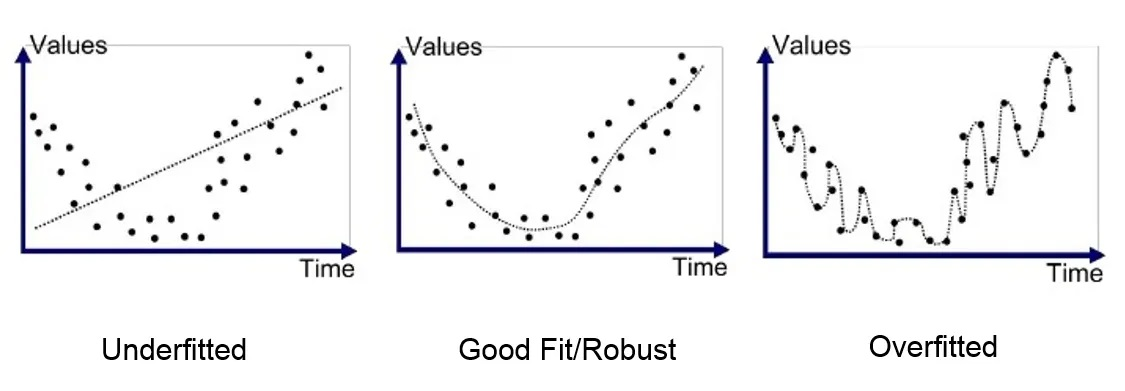

__Reference for overfitting and underfitting with sample dataset examples:__

- https://medium.com/greyatom/what-is-underfitting-and-overfitting-in-machine-learning-and-how-to-deal-with-it-6803a989c76
- https://towardsdatascience.com/learning-curve-to-identify-overfitting-underfitting-problems-133177f38df5
- https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/